# Backpropagation Lab





In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from numpy import ndarray
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from typing import Tuple
from typing import Literal
from tabulate import tabulate
import csv
import math

In [40]:
IRIS_SETOSA = 0
IRIS_VERSICOLOR = 1
IRIS_VIRGINICA = 2
FALSE, TRUE = 0, 1


def load_iris() -> Tuple[ndarray, ndarray]:
  """
  Purpose: Classification between 3 types of iris flowers

  Features:
    sepallength	(REAL)
    sepalwidth (REAL)
    petallength (REAL)
    petalwidth (REAL)

  Classifications:
    -> {Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2 }
  """
  data_arff = arff.loadarff("iris.arff")
  data_df = pd.DataFrame(data_arff[0])
  data_np = data_df.to_numpy()
  X = data_np[:, :-1]
  # y = data_np[:, -1]

  # categorical -> indicator variables (create boolean for each possible option)
  indicator_vars = pd.get_dummies(data_df['class']).to_numpy().astype(int)
  y = indicator_vars

  # convert strings/booleans to numbers
  X = X.astype(float)
  # y = np.where(y == b'Iris-setosa', IRIS_SETOSA, y)
  # y = np.where(y == b'Iris-versicolor', IRIS_VERSICOLOR, y)
  # y = np.where(y == b'Iris-virginica', IRIS_VIRGINICA, y)

  return X, y


TRAIN, TEST = 0, 1
MALE, FEMALE = 0, 1
hid, hId, hEd, hAd, hYd, had, hOd, hod, hUd, hud, hed = range(11)
ANDREW, BILL, DAVID, MARK, JO, KATE, PENNY, ROSE, MIKE, NICK, RICH, TIM, SARAH, SUE, WENDY = range(15)


def load_vowel():
  """
  Purpose: Classify Vowel Sounds (Given Accoustic Features)

  Features:
    Train or Test { Train: 0, Test: 1}
    Speaker Number { Andrew: 0, Bill: 1, David: 2, Mark: 3, Jo: 4, Kate: 5,
                     Penny: 6, Rose: 7, Mike: 8, Nick: 9, Rich: 10, Tim: 11,
                     Sarah: 12, Sue: 13, Wendy: 14 }
    Sex { Male: 0, Female: 1}
    Feature 0 (real)
    Feature 1 (real)
    Feature 2 (real)
    Feature 3 (real)
    Feature 4 (real)
    Feature 5 (real)
    Feature 6 (real)
    Feature 7 (real)
    Feature 8 (real)
    Feature 9 (real)

  Classifications:
    -> { hid: 0, hId: 1, hEd: 2, hAd: 3, hYd: 4, had: 5, hOd: 6, hod: 7, hUd: 8,
         hud: 9, hed: 10 }
  """
  data_arff = arff.loadarff("vowel.arff")
  data_df = pd.DataFrame(data_arff[0])
  data_df = data_df.drop(columns=['Train or Test', 'Speaker Number'])
  data_np = data_df.to_numpy()
  X = data_np[:, :-1]
  # y = data_np[:, -1]

  # categorical -> indicator variables (create boolean for each possible option)
  indicator_vars = pd.get_dummies(data_df['Class']).to_numpy().astype(int)
  y = indicator_vars

  # convert strings to numbers
  # X = np.where(X == b'Andrew', ANDREW, X)
  # X = np.where(X == b'Bill', BILL, X)
  # X = np.where(X == b'David', DAVID, X)
  # X = np.where(X == b'Mark', MARK, X)
  # X = np.where(X == b'Jo', JO, X)
  # X = np.where(X == b'Kate', KATE, X)
  # X = np.where(X == b'Penny', PENNY, X)
  # X = np.where(X == b'Rose', ROSE, X)
  # X = np.where(X == b'Mike', MIKE, X)
  # X = np.where(X == b'Nick', NICK, X)
  # X = np.where(X == b'Rich', RICH, X)
  # X = np.where(X == b'Tim', TIM, X)
  # X = np.where(X == b'Sarah', SARAH, X)
  # X = np.where(X == b'Sue', SUE, X)
  # X = np.where(X == b'Wendy', WENDY, X)
  X = np.where(X == b'Male', MALE, X)
  X = np.where(X == b'Female', FEMALE, X)
  # y = np.where(y == b'hid', hid, y)
  # y = np.where(y == b'hId', hId, y)
  # y = np.where(y == b'hEd', hEd, y)
  # y = np.where(y == b'hAd', hAd, y)
  # y = np.where(y == b'hYd', hYd, y)
  # y = np.where(y == b'had', had, y)
  # y = np.where(y == b'hOd', hOd, y)
  # y = np.where(y == b'hod', hod, y)
  # y = np.where(y == b'hUd', hUd, y)
  # y = np.where(y == b'hud', hud, y)
  # y = np.where(y == b'hed', hed, y)

  return X, y

def load_real_estate_valuation(flatten=True) -> Tuple[ndarray, ndarray]:
  """
  From: UC Irvine ML Repository
  Purpose: Use Regression to Estimate House Price

  Features:
    X1 transaction date (REAL)
    X2 house age (REAL)
    X3 distance to the nearest MRT station (REAL)
    X4 number of convenience stores (INT)
    X5 latitude (REAL)
    X6 longitude (REAL)

  Regression:
    Y house price of unit area (REAL)
  """
  # load csv file
  with open('real_estate_valuation.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

  # convert to numby array, and extract X and y
  data = np.array(data)
  X = data[1:, 1:-1]
  y = data[1:, -1:]
  X = X.astype(float)
  y = y.astype(float)
  if flatten:
    y = y.flatten()

  return X, y

def plot_by_epochs(y_values: list, y_axis_title: str):
    """
        Plots values on the y-axis with indexes (epochs) on the x-axis
    Args:
        y_values (array-like): A 1D array or list of y_values at every epoch
    """
    plt.plot(np.arange(len(y_values)), y_values)
    plt.title(y_axis_title + " vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel(y_axis_title)
    plt.show()


# X, y = load_iris()
# print("X:\n", str(X))
# print("y:\n", str(y))

# X, y = load_vowel()
# np.set_printoptions(edgeitems=50)
# print("X:\n", str(X))
# print("y:\n", str(y))

# X, y = load_real_estate_valuation()
# print("X:\n", str(X))
# print("y:\n", str(y))

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 1000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [ ]:
# Iris with no regularization
NUM_TRIALS = 5
avg_n_iter = 0.0 # num iterations for convergence
avg_train_acc = 0.0 # average train set accuracy
avg_test_acc = 0.0 # average test set accuracy

X, y = load_iris()

for i in range(NUM_TRIALS):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf = MLPClassifier(hidden_layer_sizes = [64],
                      activation = 'logistic',
                      solver = 'sgd',
                      alpha = 0, # setting to 0 turns off loss regularization
                      batch_size = 1,
                      learning_rate_init = 0.01,
                      shuffle = True,
                      momentum = 0,
                      n_iter_no_change = 50,
                      max_iter = 1000)
  clf.fit(X_train, y_train)

  # results
  n_iter = clf.n_iter_
  train_acc = clf.score(X_train, y_train)
  test_acc = clf.score(X_test, y_test)

  print("Trial #", str(i))
  print("   Num iterations: ", str(clf.n_iter_))
  print("   Train set accuracy: ", str(train_acc))
  print("   Test set accuracy: ", str(test_acc))

  avg_n_iter += n_iter
  avg_train_acc += train_acc
  avg_test_acc += test_acc

  # print softmax probabilities of last trial (% confidence in each prediction)
  if i == NUM_TRIALS - 1:
    print("Softmax probabilities using test data:")
    probs = clf.predict_proba(X_test)
    for i in range(len(X_test)):
      print(X_test[i], str(" -> "), probs[i], " (", y_test[i], " actual)")

avg_n_iter /= NUM_TRIALS
avg_train_acc /= NUM_TRIALS
avg_test_acc /= NUM_TRIALS

print("\nFinal Results:")
print("   Avg num iterations: ", str(avg_n_iter))
print("   Avg train set accuracy: ", str(avg_train_acc))
print("   Avg test set accuracy: ", str(avg_test_acc))

Trial # 0
   Num iterations:  308
   Train set accuracy:  0.9916666666666667
   Test set accuracy:  0.9333333333333333
Trial # 1
   Num iterations:  290
   Train set accuracy:  0.975
   Test set accuracy:  0.8
Trial # 2
   Num iterations:  220
   Train set accuracy:  0.9833333333333333
   Test set accuracy:  0.9666666666666667
Trial # 3
   Num iterations:  427
   Train set accuracy:  0.975
   Test set accuracy:  1.0
Trial # 4
   Num iterations:  288
   Train set accuracy:  0.975
   Test set accuracy:  0.9666666666666667
Softmax probabilities using test data:
[6.2 2.9 4.3 1.3]  ->  [1.62643875e-03 9.97558136e-01 2.88435453e-04]  ( [0 1 0]  actual)
[7.2 3.2 6.  1.8]  ->  [1.50119008e-05 2.06417207e-01 8.93290727e-01]  ( [0 0 1]  actual)
[5.6 3.  4.1 1.3]  ->  [1.28547490e-03 9.93294622e-01 6.00200405e-04]  ( [0 1 0]  actual)
[5.1 2.5 3.  1.1]  ->  [2.21051641e-02 9.97756908e-01 4.14091119e-06]  ( [0 1 0]  actual)
[4.8 3.  1.4 0.3]  ->  [9.98622225e-01 1.26899545e-02 1.10828733e-11]  ( [1

*Discussion*

I used pd.get_dummies to do one hot encoding. Since the Iris dataset has three potential classifications, this created three columns, one cooresponding to each classification. Then I converted the array to numpy, casted the boolean values to integer values, and used them as my y-vector (targets). The terminology used in the spec was that these are indicator variables.

Each of the five trials was able to run to convergence. The number of iterations seems realistic, varying from 220 to 427 iterations each. It was interesting to note that on trial #3, the test set actually scored perfectly. I believe this has to do with the fact that it was a lucky division of training and test data. Some inputs are easier to classify than others, and the test inputs in that trial probabily happened to get many of the easier to classify inputs.

It is good to note that in all trials except for #3, the train set accuracy is higher than the test set accuracy. This is exactly what I would expect, because the model has already seen the training set and updated weights based on it, so it should be able to fit it well.

Looking at the softmax probabilities (predictions) was very insightful. I also printed out the y_test-vector alongside each prediction to see how accurate the probabilities are. Looking through a few, I saw that the probability that was much higher than the other two always cooresponded to the correct classification.

One thing that confused me was that the values for each softmax probabilities didn't always add up to 1, though they were typically fairly close. Though it could be because of an error on my part, it could have to do with how the softmax calculates the probabilities or rounding error, but I will look more into it.

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but his time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

Trial # 0
   Num iterations:  118
   Train set accuracy:  0.9666666666666667
   Test set accuracy:  0.9333333333333333
   Best validation score:  1.0
Trial # 1
   Num iterations:  142
   Train set accuracy:  0.9416666666666667
   Test set accuracy:  0.9
   Best validation score:  1.0
Trial # 2
   Num iterations:  60
   Train set accuracy:  0.675
   Test set accuracy:  0.6333333333333333
   Best validation score:  0.8666666666666667
Trial # 3
   Num iterations:  105
   Train set accuracy:  0.9166666666666666
   Test set accuracy:  0.8
   Best validation score:  1.0
Trial # 4
   Num iterations:  159
   Train set accuracy:  0.9833333333333333
   Test set accuracy:  1.0
   Best validation score:  1.0
Softmax probabilities using test data:
[7.1 3.  5.9 2.1]  ->  [8.70487260e-05 1.90530915e-01 9.46450367e-01]  ( [0 0 1]  actual)
[5.9 3.  4.2 1.5]  ->  [0.00407327 0.75993589 0.03841338]  ( [0 1 0]  actual)
[4.8 3.  1.4 0.3]  ->  [9.94863997e-01 7.39957241e-02 5.23101469e-08]  ( [1 0 0]  actua

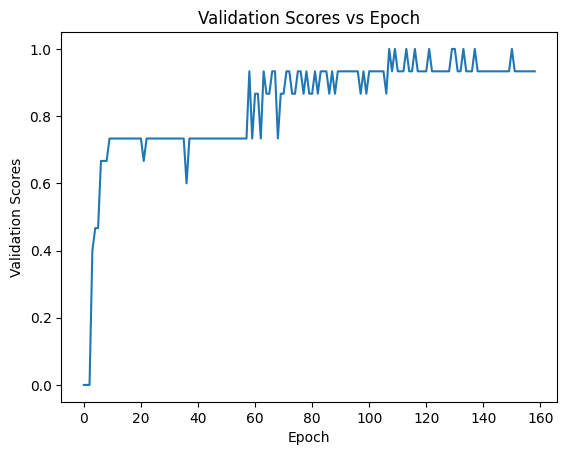


Final Results:
   Avg num iterations:  116.8
   Avg train set accuracy:  0.8966666666666665
   Avg test set accuracy:  0.8533333333333333
   Avg best validation score:  0.9733333333333334


In [ ]:
#Iris with early stopping and validation scores graph
# Early stopping - specify the 3 parameters:
# (1) Set early stopping = True
# (2) Select % of training data to be validation set (10%-20% is normal
# (3) Select max # iterations no change
NUM_TRIALS = 5
avg_n_iter = 0.0 # num iterations for convergence
avg_train_acc = 0.0
avg_test_acc = 0.0
avg_best_validation_score = 0.0

X, y = load_iris()

for i in range(NUM_TRIALS):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf = MLPClassifier(hidden_layer_sizes = [64],
                      activation = 'logistic',
                      solver = 'sgd',
                      alpha = 0,
                      batch_size = 1,
                      learning_rate_init = 0.01,
                      shuffle = True,
                      momentum = 0,
                      n_iter_no_change = 50, # used for early stopping
                      max_iter = 1000,
                      early_stopping = True, # new
                      validation_fraction = 0.12) # new
  clf.fit(X_train, y_train)

  # results
  n_iter = clf.n_iter_
  train_acc = clf.score(X_train, y_train)
  test_acc = clf.score(X_test, y_test)
  best_validation_score = clf.best_validation_score_ # new

  print("Trial #", str(i))
  print("   Num iterations: ", str(clf.n_iter_))
  print("   Train set accuracy: ", str(train_acc))
  print("   Test set accuracy: ", str(test_acc))
  print("   Best validation score: ", str(best_validation_score)) # new

  avg_n_iter += n_iter
  avg_train_acc += train_acc
  avg_test_acc += test_acc
  avg_best_validation_score += best_validation_score

  if i == NUM_TRIALS - 1:
    # print softmax probabilities
    print("Softmax probabilities using test data:")
    probs = clf.predict_proba(X_test)
    for i in range(len(X_test)):
      print(X_test[i], str(" -> "), probs[i], " (", y_test[i], " actual)")

    # graph validation set accuracy vs epochs
    plot_by_epochs(clf.validation_scores_, "Validation Scores")


avg_n_iter /= NUM_TRIALS
avg_train_acc /= NUM_TRIALS
avg_test_acc /= NUM_TRIALS
avg_best_validation_score /= NUM_TRIALS

print("\nFinal Results:")
print("   Avg num iterations: ", str(avg_n_iter))
print("   Avg train set accuracy: ", str(avg_train_acc))
print("   Avg test set accuracy: ", str(avg_test_acc))
print("   Avg best validation score: ", str(avg_best_validation_score))

*Discussion of average values above and the validation score graph*  

Using early stopping yielded results that the note said would appear. For example, the average training and test set accuracies were actually lower than they were when not using early stopping. Without early stopping they were 98% and 93%, respectively, while with early stopping they were 89% and 85%, respectively. This is due to the fact that the Iris dataset is pretty small, so much of the little amount of data it taken up for the testing and validation sets.

It is also important to note that the average number of iterations went down from 306 without early stopping to 116 with early stopping. This means that compute time was almost a third, and early stopping did take effect.

It is interesting to note that the best validation score was 1.0 in 4 of the 5 trials. I think this is probably because, again, the data sets were quite small so it lucked out that way. Also, the validation set was taken from only a fraction of the training set, so that chance of getting lucky and easy to classify inputs in it are higher.

Looking at the graph, it is important to not that on the last trial (the one used to make the graph), there were 159 iterations, so the graph shows the validation score at the end of each iteration. In the first 15 iteratoins or so, the score shoots up quickly, and I wasn't surprised at that because it is the principle of diminishing returns. It's interesting that between epochs 15 and 60, there really wasn't much improvement, but at epoch 60, it must have found its way out of a minima and instantly improved after which the improvements were small. N_iter_no_change was set to 50 so I the last period from about 110 to 160 was the inteval of 50 epochs where no significant improvement was seen so it stopped there at round 159.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

In [ ]:
#Iris with Loss Regularization

# Regularization Value (% weight decay at each iteration)
# higher alpha -> more generalization, higher chance of underfit
# lower alpha -> less generalization, higher change of overfit
alpha_values = [0.0001, 0.001, 0.01, 0.1]

X, y = load_iris()

table = []
for i, alpha in enumerate(alpha_values):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf = MLPClassifier(hidden_layer_sizes = [64],
                      activation = 'logistic',
                      solver = 'sgd',
                      alpha = alpha, # loss regularization alpha value
                      batch_size = 1,
                      learning_rate_init = 0.01,
                      shuffle = True,
                      momentum = 0,
                      n_iter_no_change = 50,
                      max_iter = 1000)
  clf.fit(X_train, y_train)

  # results
  n_iter = clf.n_iter_
  train_acc = clf.score(X_train, y_train)
  test_acc = clf.score(X_test, y_test)
  best_loss = clf.best_loss_ # lowest loss value achieved (lower is better)

  table.append([i, alpha, n_iter, train_acc, test_acc, best_loss])

headers = ["Trial", "Alpha", "Num Iters for Conv", "Train Acc", "Test Acc",
           "Best Loss Score"]
print(tabulate(table, headers=headers))

  Trial    Alpha    Num Iters for Conv    Train Acc    Test Acc    Best Loss Score
-------  -------  --------------------  -----------  ----------  -----------------
      0   0.0001                   266     0.991667    0.933333           0.13784
      1   0.001                    234     0.983333    0.966667           0.24723
      2   0.01                     346     0.966667    0.966667           0.800134
      3   0.1                      137     0.616667    0.733333           1.64376


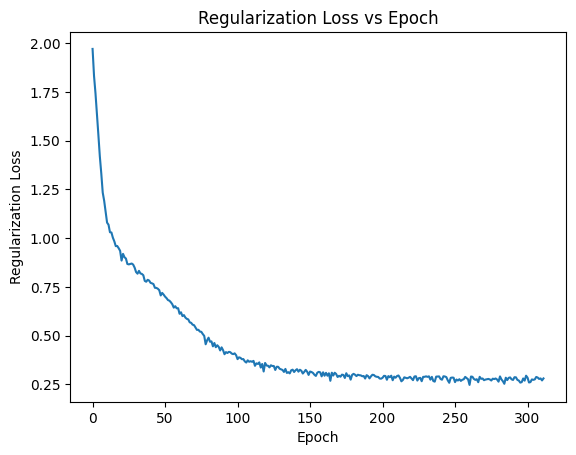

In [ ]:
best_alpha = 0.001

X, y = load_iris()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = MLPClassifier(hidden_layer_sizes = [64],
                    activation = 'logistic',
                    solver = 'sgd',
                    alpha = best_alpha, # loss regularization alpha value
                    batch_size = 1,
                    learning_rate_init = 0.01,
                    shuffle = True,
                    momentum = 0,
                    n_iter_no_change = 50,
                    max_iter = 1000)
clf.fit(X_train, y_train)

# graph regularization loss vs epochs
plot_by_epochs(clf.loss_curve_, "Regularization Loss")


*Discussion and comparison between no regularization, early stopping and loss regularization*

## Results from Loss Regularization

I ran the MLPClassifier using alpha values (regularization values) from 0.0001 up to 0.1 by multiples of 10. Smaller alpha values mean that loss regularization will cause less generalization, while larger values lead to more generalization. With less generalization, there is a higher chance of overfit, while with more, there is a higher chance of underfit.

I noticed that with a small alpha value (0.0001), the training set performed very well (99% accuracy), and the test set scored 93% accuracy. This is becasue with such a small alpha value, there is almost no generalization, so the model is very well fit to the test data, and isn't generalized well to fit the training data. Moving down the trials, as we increased the alpha value, the training accuracy slowly got worse, while the test accuracy got better. This is for the same reason explained above.

In fact, look at trail 3 (alpha of 0.1). With such a high alpha, the generalization is very high, and the test set accuracy is actually higher than the training set accuracy. While this wouldn't necessarily happen every time (i.e. if we were to run with alpha of 0.1 1000 times and average the scores), and likely has to do with the fact that the test set isn't very big, it demonstrates that a higher alpha is leading to more generalization.

The best loss score is the lowest loss value achieved. The trend here is that as alpha increases, the best loss value also increases. This means that with more generalization, it is more difficult to get low loss values in training. I don't think that this is necessarily an issue, because the point of generalization is to not simply fit well for the training data, but also for the test and real world data. Again, I think that either extreme (highest/lowest best loss score) is typically not actually the best, and it is somewhere in between.

From these four trials, it appears that the best alpha was 0.001. While 0.0001 had a higher training set accuracy, that really isn't very relevant becuase it simply overfit the data, and training accuracy is more telling of how the model will perform on real world data. With 0.001, the test accuracy was the same as that of 0.01, but the training accuracy was higher, so I gave the win to 0.001. Of course, if I had done many trials for each alpha value and averaged the scores, the data would be more accurate and I would have a better idea of which for sure is better.

Looking at the graph of regularization loss for the best alpha, it is interesting to see how similar it is to an exponential decay function, though the loss settles around 0.3 rather than at 0 ina regular decay function. From epochs 0 to about 15, there is very strong improvement, from epochs 15 to about 70, there is consistent improvement, and from epochs 70 to 300, there is still improvement, but the improvement decreases as time goes on and after epoch 250 or so, there really isn't much or any noticable improvement. N_iter_no_change is set to 50, so that checks out.

## Comparison of (1) No Regularization, (2) Early Stopping with Validation Set, and (3) Early Stopping with Loss Regularizaiton

Loss regularization outperformed the other two methods by quite a bit. Its test accuracy (which is the more important feature) was 96.67% which is pretty good. No regularization achieved 93.33% test accuracy, while early stopping with validation only scored 85.33% test accuracy. On training set accuracy, loss regularization also scored slightly higher than no regularization, and significantly higher than early stopping with validation, though this number doesn't tell much on how well it will perform on real world data. One thing to not is that with loss regularization, I only did 1 trial with the best regularizaiton value, so increasing that number could increase accuracy. Additionally, the test set was quite small, so early stopping with the validation set particularly took a hit, because the validation set was pretty small. It the data sets were higher, and I had done more trials, these results could have varied. From the limited trials I've done here however, it appears that using loss regularization was the best way to generalize the model to the correct amount and achieve the highest test set accuracy.

## 2 Hyperparameters
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum.

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great example for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

*Discuss these items here*  

## Baseline Accuracies

For the Iris dataset, there are three possible classifications (flowers) and since there are an equal number of each flower in the dataset, the baseline accuracy is simply `[0.33, 0.33, 0.33]` because it is split between the three.

For the Vowel dataset, there are 11 possible classifications (sounds) and since there are an equal number of each classification in the dataset, the baseline accuracy is simply `[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]` because it is split between the three.

## Why the Vowel Data Set Will Have Lower Accuracy

The vowell dataset will have lower accuracy because there are more possible classifications. If the model is only as good as a random guess, its accuracy would be about 0.0909 becasue there is a lower chance of guessing the right classification. There are more ways it could guess wrong, and the space is larger.

## Which Input Features to Not Include and Why

Dropping: `Train or Test`, and `Speaker Number`

There are a couple of featuers I decided to drop. First was the `Train or Test` column. This is completely irrelevant to being able to determine the classification. I will rather derive the train and test sets from a random split. I also decided to drop the `Speaker Number` column. While this may help improve accuracy with a test set derived from this data, it won't help in the future if we want other individuals that didn't help with testing to be able to use the model to make classifications with their voices.

I am leaving `Gender` category because it will male and female voices are different, so this will help the model be able to understand distinctions between genders. I will also leave all the other featuers. Right now, I no nothing from them, becasue they are simply numerical values cooresponding to certain aspects of sounds, but I don't know anything about them from a static analysis. After training the model, I will likely know more about which features are more important and know enough to be able to drop some if needed.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model a fair chance.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [ ]:
# Train with different learning rates
learning_rates = [0.001, 0.01, 0.1, 1.0, 10.0]

X, y = load_vowel()

table = []
for i, learning_rate in enumerate(learning_rates):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
  clf = MLPClassifier(hidden_layer_sizes = [22], # 11 input features x2 = 22
                      activation = 'logistic',
                      solver = 'sgd',
                      alpha = 0,
                      batch_size = 1,
                      learning_rate_init = learning_rate,
                      shuffle = True,
                      momentum = 0,
                      n_iter_no_change = 50,
                      max_iter = 1000)
  clf.fit(X_train, y_train)

  # results
  n_iter = clf.n_iter_
  train_acc = clf.score(X_train, y_train)
  test_acc = clf.score(X_test, y_test)

  table.append([i, learning_rate, n_iter, train_acc, test_acc])

headers = ["Trial", "Learning Rate", "Num Epochs for Conv", "Train Acc",
           "Test Acc",]
print(tabulate(table, headers=headers))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Trial    Learning Rate    Num Epochs for Conv    Train Acc    Test Acc
-------  ---------------  ---------------------  -----------  ----------
      0            0.001                   1000    0.513477    0.483871
      1            0.01                    1000    0.981132    0.846774
      2            0.1                      731    0.997305    0.854839
      3            1                        212    0.540431    0.532258
      4           10                        108    0.0916442   0.0887097


*Discuss your table and the effect of different learning rates on both training time and accuracy*

The learning rate is how fast the MLP updates weights. In general, updating weights in large increments may be dangerous because it can cause the algorithm to jump over a minima rather than settling into it. Having smaller updataes is often better because it allows the algorithm to arrive right in a local minima. The downside, however, is that it can take a long time to train because updates are so small. You can see this when looking at trials 0 and 1 with the smaller learning rates. Since I set my max_iter to 1000, both of these trials were unable to finish in time. You can tell that for learning rate `0.001`, training wasn't near done yet, becasue accuracy for train and test sets were both around 50%. Note that this isn't awefull becasuethere are 11 possible datasets, so the 50% is much better than the baseline 9.09% accuracy.

For learning rate `0.01`, it appears that even though it still reached that maximum number of epochs, training was much done becasue the train accuracy was less than 2% off of 100%, and the test accuracy was almost as high as the best trial. The best results were seen with the learning rate `0.1`, where it performed almost perfectly on the train data and test accuracy was 85.5% which is better than any of the others.

It is interesting to look at trials 3 and 4 with the larger learning rates, because we can see the effect of the learning rate being too big. In trial 3 with a learning rate of `1`, train and test accuracy were both only about 54% (remember that this is still much better than a random guess becasue there are 11 classification options). I am pretty sure the drop here has to do with the fact that it is jumping over the minima and not able to settle down in it well. Looking at trial 4 with a learning rate of `10`, the accuracy is no better than average. It is clear that the learning rate was way too big, and the weight updates were so large that they jumper right over the optimal weights.

This data is a great example that it is better in general to have a smaller learning rate, but we have to be cogniscent about how much computing resources we have, because if the learning rate is too small, it will take too long to train. Its also important to note that in this trial, the learning rate was kept constant and never updated. A lot of time could have been saved by using a method such as invscaling or adaptive to adjust the learning rate as you learn. Also note that here, I split the training and testing data differently with each trial. I should have left them the same to give more consistent circumstances for each trial. I changed this in 2.3.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy.
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [ ]:
# Train with different numbers of hidden nodes
best_learning_rate = 0.1 # determined in 2.2
num_nodes_trials = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

X, y = load_vowel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

table = []
for i, num_nodes in enumerate(num_nodes_trials):
  clf = MLPClassifier(hidden_layer_sizes = [num_nodes], # 11 input features x2 = 22
                      activation = 'logistic',
                      solver = 'sgd',
                      alpha = 0,
                      batch_size = 1,
                      learning_rate_init = best_learning_rate,
                      shuffle = True,
                      momentum = 0,
                      n_iter_no_change = 50,
                      max_iter = 1000)
  clf.fit(X_train, y_train)

  # results
  n_iter = clf.n_iter_
  train_acc = clf.score(X_train, y_train)
  test_acc = clf.score(X_test, y_test)

  table.append([i, num_nodes, n_iter, train_acc, test_acc])

headers = ["Trial", "Num Nodes", "Num Epochs for Conv", "Train Acc",
           "Test Acc",]
print(tabulate(table, headers=headers))

  Trial    Num Nodes    Num Epochs for Conv    Train Acc    Test Acc
-------  -----------  ---------------------  -----------  ----------
      0            1                    270     0           0
      1            2                    225     0.138814    0.169355
      2            4                    185     0.261456    0.258065
      3            8                    367     0.668464    0.629032
      4           16                    469     0.963612    0.766129
      5           32                    754     1           0.907258
      6           64                    464     1           0.927419
      7          128                    476     1           0.907258
      8          256                    508     1           0.927419
      9          512                    525     1           0.919355


*Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy*

I'm not seeing a huge coorelation between number of nodes and the number of epochs for convergence. However, it seems to more or less increase until there are 32 nodes where is maxes out, and then decreases some from there. However,I think the lack of a better patter could have to do with the fact that I only did one trial at each number of nodes, and only used one dataset without modifying the training and test divisions between iterations. Increasing those may show a more consistent pattern.

It's interesting to note that the training set accuracy steadily increases until at 32 nodes where it and all trials after it achieved perfect accuracy for the training set. This doesn't tell much, because it could simply be due to overfit. Looking at the test accuracy, the best score was with `64` nodes. I doubled it three times after that, and while with 256 nodes, it tied for the same accuracy, there was no more improvement. At 92.47% accuracy, there is room for improvement, but considering there are 11 classifications, that is pretty good accuracy, and is better than what I was able to achieve with only fine tuning the learning rate.

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [ ]:
# Train with different momentum values
best_learning_rate = 0.1 # from 2.2
best_num_hidden_nodes = 64 # from 2.3

momentums = [0, 0.25, 0.5, 0.75, 0.99]

X, y = load_vowel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

table = []
for i, momentum in enumerate(momentums):
  clf = MLPClassifier(hidden_layer_sizes = [best_num_hidden_nodes],
                      activation = 'logistic',
                      solver = 'sgd',
                      alpha = 0,
                      batch_size = 1,
                      learning_rate_init = best_learning_rate,
                      shuffle = True,
                      momentum = momentum,
                      n_iter_no_change = 50,
                      max_iter = 1000)
  clf.fit(X_train, y_train)

  # results
  n_iter = clf.n_iter_
  train_acc = clf.score(X_train, y_train)
  test_acc = clf.score(X_test, y_test)

  table.append([i, momentum, n_iter, train_acc, test_acc])

headers = ["Trial", "Momentum", "Num Epochs for Conv", "Train Acc",
           "Test Acc",]
print(tabulate(table, headers=headers))


  Trial    Momentum    Num Epochs for Conv    Train Acc    Test Acc
-------  ----------  ---------------------  -----------  ----------
      0        0                       512    1            0.931452
      1        0.25                    417    1            0.939516
      2        0.5                     322    1            0.951613
      3        0.75                    180    0.715633     0.629032
      4        0.99                    142    0.0876011    0.100806


*Discuss your table and the effect of momentum on both training time and accuracy*

Momentum is a hyperparameter that can lead help training occur faster. When changes repeatedly occur in the same direction, momentum speeds up how fast the weights update. The possible values for momentum range from 0 to just under 1. At zero, there is simply no momentum effect.

Looking atthe results, I noticed that increasing momentum always decreased the number of epochs for convergence. This is what I would expect, because momentum simply helps you move quicker if you are going in the right direction. From momentum being 0 to 0.99, the number of epochs was cut to less than a third.

Looking at accuracies, there was a sweet spot. For training set accuracy, it was perfect until momoentum got too big. For 0.75 and especially 0.99, accuracy decreased significantly. I think this is because you end up jumping too far over the best minima.

For the test set accuracy, interestingly, the sweet spot was with a momentum of 0.5. Going higher than that led to significany losses in accuracy, while going lower only lost a maximum of about 2%. This demonstrates that it is safer to air on a lower momentum value, though of course, these trials are limited and using larger data sets and more trials would give more insight here.

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html)
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not always blindly assume that a tool will get you the results you expect and that you may need to consider multiple approaches.

In [7]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.
from sklearn.model_selection import GridSearchCV

X, y = load_vowel()

clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':(.01, .1, 1),
              'hidden_layer_sizes': ([32], [64], [128]),
              'momentum':(0, .25, .5)}
grid = GridSearchCV(clf, parameters)
grid.fit(X,y) #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

{'hidden_layer_sizes': [128], 'learning_rate_init': 0.1, 'momentum': 0.25}
0.4404040404040404


In [8]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

X, y = load_vowel()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=0.01, scale=.99), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([32], [64], [128]), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X,y)
print(search.best_params_)
print(search.best_score_)

{'hidden_layer_sizes': [128], 'learning_rate_init': 0.36862805837804963, 'momentum': 0.33408090406386265}
0.3494949494949495


*Discussion and comparison of grid and randomized parameter search*

For both grid search and randomized search, results really weren't that great. Grid search ended up with 44% accuracy, and randomized search had 35% accuracy. It is important to remember that there are 11 different classification, so both of those are much better than average, but by trying out parameters on my own, I achieved about 95% accuracy. I noticed that on grid search, the best results came with using lr 0.1 which was the best I had found in my own testing in previoius problems. However, for randomized, it was 0.37 which I am sure that with more trials, a different value (perhaps closer to 0.1) would be returned for that. The momentums returned by each was 0.25, and 0.33, respectively which, looking at my chart from 2.4, I can see that those are likely good values.

Though the results were not great, I believe that they could be improved. For grid search, that would involve adding more possible hyperparameter values to try. For randomized search, it would mean increasing the iterations to more than 10. I think my biggest takeaway from this problem is that it can take a lot of trial and error to find the best hyperparameters, but using what intuition you have about the meaning of each hyperparameter can help you get to a good configuration more quickly.

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great place to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [ ]:
# Load and Learn a real world regression data set
X, y = load_real_estate_valuation()
X = MinMaxScaler().fit_transform(X) # normalize X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = MLPRegressor(hidden_layer_sizes = [64],
                    activation = 'logistic',
                    solver = 'sgd',
                    alpha = 0,
                    batch_size = 1,
                    learning_rate_init = 0.01,
                    shuffle = True,
                    momentum = 0,
                    n_iter_no_change = 50,
                    max_iter = 1000)
clf.fit(X_train, y_train)

# mean absolute error (how much the output is off on average)
print("Train Set MAE: ", mean_absolute_error(clf.predict(X_train), y_train))
print("Test Set MAE: ", mean_absolute_error(clf.predict(X_test), y_test))

Train Set MAE:  3.8054130246178097
Test Set MAE:  6.198608561093369


*Discussion*

For regression, I chose to use a real estate pricing dataset from the UC Irvine ML Repository. The dataset has six different features in X, and and the regression value is the cost of the house per area unit in Taiwanese dollars.

To normalize the input values (X), I used Scikit-learn's MinMaxScalar. It's default is to normalize values between 0 and 1. This was easy to figure out and use.

For the parameters, I used all the same parameters used in 1.1 with MLPClassifier. I read through the documentation's description of each one to ensure that the value made sense for the Regressor, and everything checked out.

To show model performane, I used mean absolute error. This is similar to mean squared error, but it doesn't square each error, so the result can be taken at face value. For example, the MAE on the training set was 3.80. The cost of houses per area unit (in Taiwanese dollars) varied between about 20 to 60, so an MAE of 3.80 means that the model was off 3.80 Taiwanese dollars per area unit on average. The test set MAE was 6.19 meaning that the prediction was off by an average of 6.19 Taiwanese dollars per area unit. The numbers appear to be realistic, as I would expect the predictions to be more accurate on the training data, because it has been seen before. Also, being off by 3 to 6 Taiwanese dollars per area unit seem about right when houses sold for 20 to 60 dollars per area unit.

### 3.2 (10%) - Other MLP Hyperparameters
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required.

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklean does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [ ]:
# Run with different hyperparameters
default_params = {
    'hidden_layer_sizes': [64],
    'activation': 'logistic',
    'solver': 'sgd',
    'alpha': 0,
    'batch_size': 1,
    'learning_rate_init': 0.01,
    'shuffle': True,
    'momentum': 0,
    'n_iter_no_change': 50,
    'max_iter': 1000
}

trials = [
    [{'activation': 'logistic'}, "Avtivation Function: logistic"],
    [{'activation': 'tanh'}, "Avtivation Function: tanh"],
    [{'activation': 'relu'}, "Avtivation Function: relu"],
    [{'hidden_layer_sizes': [64]}, "Hidden Layers: 1x64 Nodes"],
    [{'hidden_layer_sizes': [64, 64]}, "Hidden Layers: 2x64 Nodes"],
    [{'hidden_layer_sizes': [64, 64, 64]}, "Hidden Layers: 3x64 Nodes"],
    [{'solver': 'sgd'}, "Solver: sgd"],
    [{'solver': 'adam'}, "Solver: adam"],
    [{'solver': 'lbfgs'}, "Solver: lbfgs"],
    [{'batch_size': 1}, "Batch Size: 1"],
    [{'batch_size': 100}, "Batch Size: 100"],
    [{'batch_size': 200}, "Batch Size: 200"],
    [{'learning_rate': 'constant'}, "Learning Rate Adaption: Constant"],
    [{'learning_rate': 'invscaling'}, "Learning Rate Adaption: Invscaling"],
    [{'learning_rate': 'adaptive'}, "Learning Rate Adaption: Adaptive"]
]

X, y = load_real_estate_valuation()
X = MinMaxScaler().fit_transform(X) # normalize X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for trial in trials:
  trial_params, trial_title = trial[0], trial[1]
  params = {**default_params, **trial_params}

  clf = MLPRegressor(**params)
  clf.fit(X_train, y_train)

  print(trial_title)
  print("   Num Iterations: ", clf.n_iter_)
  print("   Train Set MAE: ", mean_absolute_error(clf.predict(X_train), y_train))
  print("   Test Set MAE: ", mean_absolute_error(clf.predict(X_test), y_test))


Avtivation Function: logistic
   Num Iterations:  479
   Train Set MAE:  4.395856580002049
   Test Set MAE:  5.1787800398926045
Avtivation Function: tanh
   Num Iterations:  184
   Train Set MAE:  4.774979283069192
   Test Set MAE:  5.737246471689992
Avtivation Function: relu
   Num Iterations:  69
   Train Set MAE:  6.4767721502855
   Test Set MAE:  6.311839202420985
Hidden Layers: 1x64 Nodes
   Num Iterations:  407
   Train Set MAE:  4.573273002818494
   Test Set MAE:  5.179737623210011
Hidden Layers: 2x64 Nodes
   Num Iterations:  541
   Train Set MAE:  3.817450429039524
   Test Set MAE:  5.560997908827189
Hidden Layers: 3x64 Nodes
   Num Iterations:  458
   Train Set MAE:  3.9846382561408094
   Test Set MAE:  5.1578580525483355
Solver: sgd
   Num Iterations:  501
   Train Set MAE:  4.286590577029622
   Test Set MAE:  5.402109881431841
Solver: adam
   Num Iterations:  654
   Train Set MAE:  3.577878046128675
   Test Set MAE:  5.8923150071378645


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Solver: lbfgs
   Num Iterations:  1000
   Train Set MAE:  2.460354185998417
   Test Set MAE:  7.809441180531832
Batch Size: 1
   Num Iterations:  555
   Train Set MAE:  4.469932289546121
   Test Set MAE:  4.964162873290322


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Batch Size: 100
   Num Iterations:  1000
   Train Set MAE:  5.337750280761626
   Test Set MAE:  5.240567375495366


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Batch Size: 200
   Num Iterations:  1000
   Train Set MAE:  5.693043879294212
   Test Set MAE:  5.4221376406515605
Learning Rate Adaption: Constant
   Num Iterations:  420
   Train Set MAE:  4.691328359562175
   Test Set MAE:  5.237882031296957


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate Adaption: Invscaling
   Num Iterations:  1000
   Train Set MAE:  5.781119970498937
   Test Set MAE:  5.495903984651197
Learning Rate Adaption: Adaptive
   Num Iterations:  1000
   Train Set MAE:  4.199652718162061
   Test Set MAE:  5.218147838451525


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


*Discussion*

I was able to experiment with several different parameters but for time, I will just discuss the two required ones (Activation function and multiple hidden layers).

## Activation Function (logistic, tanh, relu)

The activation function is used in the MLP algorithm to compute the output (z) from the input (net) for a node. Logistic is also known as the sigmoid function, and apart from values that are very close to the center, returns a number very close to 0 or 1. This can be really good for classifying values as one of two classes, but I was surprised to find that it performed better than both tanh and relu. Tanh is the hyperbolic tangent function. It also uses an s-curve like the sigmoid/logistic function, but its values go from -1 to 1. The biggest difference to the sigmoid function is the difference in the range and the fact that it centers around y = 0, as well as the fact that there is a steeper gradiant than the sigmid function. With tanh, the number of iterations was almost cut in third compared to that of the logistic function, but performance on both the training and test set dropped slightly (about 0.5 for both training and test). Relu uses the max of 0 and x, which means that from x <= 0, the y values is 0 (flat), then at x = y, there is an infinite straight line at a slope of 1. From what I read, relu is better for deeper networks, which may be why here, with only one hidden layer, the regressor actually performed worse than both other activation functions. One benefit, however, is that training only took 69 epochs vs 479 epochs with logistic and 180 epochs with tanh.

## Multiple hidden layers ([64], [64, 64], [64, 64, 64])

Hidden layers are the nodes in between the input and output layers. The way these are specified in MLPRegressor (and classifier) it to pass a list where each index represents a hidden layer, and the value at each index represents the number of nodes in that layer. I decided to experiment with three options, the first having one layer with 64 nodes, the second having two layers with 64 nodes in each, and the third having three layers with 64 nodes in each. Interestingly, increading the number of layers didn't increase the number of iterations till convergence. That could have to do with how the data ended up being split, and just the luck of it, but I'm sure it also has to do with the fact that when there are more nodes, every node is still visited in each iteration, so having more nodes doesn't necessarily hinder the number of iterations until convergence.


## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one activation function for all hidden and output nodes if you want (e.g. logistic activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening that implementing other models so the extra credit points are higher than typical.

*Discuss your results and any differences*

Implementing the MLP was a lot of work, but a lot of fun! I used the same activation function (logistic) as the homework problem, as well as the same error functions for both output and hidden layers. Because of this, I was able to compare results to the HW problem and ensure that it was functioning properly. If you scroll down to past the implementation, you can see where I ran my MLP on the homework problem and the results are the same.

I also ran my MLP on the Iris dataset (also below) and got excellent results. It's training set score was almost 100%, and the test set score was 93%, though having messed around with parameters a bit, I did get ~97% at least once, which is good as I got with the Scikit-Learn MLP with loss regularization.

I tried to break everything out into functions as much as possible, so hopefully, the code is easy to read and understand. An interesting decision that I had to make was how to implement my score function. In the process, I learned the distinction between `multi-class classification` where the classification is one of several classes and `multi-label classification`, where the classification can be true for any number of attributes. Since the Iris data set is multi-class classifcation, I implemented my score function that way. It simply picks the greatest value as the winner, and compares that to the expected value in y.

As a note for understanding my implementation, I saw that state variable terminology could easily become complicated, so I decided to use `1` for the input layer, `2` for the hidden layer, and `3` for the output layer. This makes understanding the variables more inuitive when looking at a lot of them. Additionally, I use `W` for weights, `N` for net, `Z` for output, and `E` for error. My implementation only allows for one hidden layer.


In [34]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import shuffle

class MLP(BaseEstimator,ClassifierMixin):
  """
  NOTE - The current score function is built for multi-class classification (an
         output may be one of several classes), rather than multi-label
         classification (an output may be any number of the labels). If you want
         to perform multi-label classifcation, simply implement a score function
         that assumes that any number of the outputs can be part of the
         classification (rather than only one)

  X:
    [[1a, 1b, 1c],
     [2a, 2b, 2c],
     [3a, 3b, 3c],
    ]
  y: [[1], NOTE - y for each input set MUST be in an array
      [2]
      [3]]
  Layer Representation:
    output_layer:    [7]        width=len(y[0])
    hidden_layer: [4, 5, 6_bias]  width=hidden_layer_widths + 1 (bias) (only 1 hidden layer)
    input_layer:  [1, 2, 3_bias]  width=len(X[0]) + 1 (bias)
  Weight Representation:
    W_1_to_2: input -> hidden
          4 5 6
      1 | . . .
      2 | . . .
      3 | . . .
    W_2_to_3: hidden -> output
          7
      4 | .
      5 | .
      6 | .
  """

  def __init__(self,lr=.1, momentum=0, shuffle=True,hidden_layer_widths=8):
    """ Initialize class with chosen hyperparameters.

    Args:
      lr (float): A learning rate / step size.
      shuffle(boolean): Whether to shuffle the training data each epoch. DO NOT SHUFFLE for evaluation / debug datasets.
      momentum(float): The momentum coefficent
    Optional Args (Args we think will make your life easier):
      hidden_layer_widths (list(int)): A list of integers which defines the width of each hidden layer if hidden layer is none do twice as many hidden nodes as input nodes. (and then one more for the bias node)
      For example: input width 1, then hidden layer will be 3 nodes
    Example:
      mlp = MLP(lr=.2,momentum=.5,shuffle=False,hidden_layer_widths = [3,3]),  <--- this will create a model with two hidden layers, both 3 nodes wide
    """
    self.hidden_layer_widths = hidden_layer_widths
    self.lr = lr
    self.momentum = momentum
    self.shuffle = shuffle

  def fit(self, X, y, initial_weights=None, max_iter=1000):
    """ Fit the data; run the algorithm and adjust the weights to find a good solution

    Args:
      X (array-like): A 2D numpy array with the training data, excluding targets
      y (array-like): A 2D numpy array with the training targets
    Optional Args (Args we think will make your life easier):
      initial_weights (array-like): allows the user to provide initial weights
    Returns:
      self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

    """
    self.init_cache(initial_weights)

    # compute epochs until 3 consequtive epochs have no weight change greater than TOL
    self.tol = 0.001
    n_epochs_below_tol, self.n_epochs = 0, 0
    while n_epochs_below_tol < 50 and self.n_epochs < max_iter:
      # run epoch
      max_change = self.run_epoch(X, y)

      # prepare for next epoch
      self.n_epochs += 1
      n_epochs_below_tol = n_epochs_below_tol + 1 if max_change < self.tol else 0
      if self.shuffle:
        X, y = shuffle(X, y)

    return self

  def predict(self, X):
    """ Predict all classes for a dataset X
    Args:
      X (array-like): A 2D numpy array with the training data, excluding targets
    Returns:
      array, shape (n_samples,)
        Predicted target values per element in X.
    """
    n_rows, n_cols = X.shape[0], len(self.Z_3)
    res = np.zeros((n_rows, n_cols))
    for row in range(n_rows):
      self.set_inputs(X[row, :])
      self.propagate_forward()

      for col in range(n_cols):
        res[row, col] = self.Z_3[col]

    return res

  def score(self, X, y):
    """ Return accuracy of model on a given dataset. Must implement own score function.

    Args:
      X (array-like): A 2D numpy array with data, excluding targets
      y (array-like): A 2D numpy array with targets

    Returns:
      score : float
        Mean accuracy of self.predict(X) wrt. y.
    """
    z = self.predict(X)
    rows, cols = z.shape[0], z.shape[1]

    num_correct = 0
    for row in range(rows):
      max_i_t = np.argmax(y[row, :])
      max_i_z = np.argmax(z[row, :])
      if max_i_t == max_i_z:
        num_correct += 1

    return num_correct / rows

  def init_cache(self, initial_weights: float | None):
    n_nodes_1 = X.shape[1] + 1               # input nodes, +1 for bias
    n_nodes_2 = self.hidden_layer_widths + 1 # hidden nodes, +1 for bias
    n_nodes_3 = y.shape[1]                   # output nodes

    # weight vectors
    LOW, HIGH = -0.01, 0.01
    SHAPE_W_1_TO_2 = (n_nodes_1, n_nodes_2 - 1)
    SHAPE_W_2_TO_3 = (n_nodes_2, n_nodes_3)
    if (initial_weights):
      self.W_1_to_2 = np.full(fill_value=initial_weights, shape=SHAPE_W_1_TO_2)
      self.W_2_to_3 = np.full(fill_value=initial_weights, shape=SHAPE_W_2_TO_3)
    else:
      self.W_1_to_2 = np.random.uniform(low=LOW, high=HIGH, size=SHAPE_W_1_TO_2)
      self.W_2_to_3 = np.random.uniform(low=LOW, high=HIGH, size=SHAPE_W_2_TO_3)
    self.delta_W_1_to_2 = np.zeros(SHAPE_W_1_TO_2)
    self.delta_W_2_to_3 = np.zeros(SHAPE_W_2_TO_3)

    # net vectors
    self.N_2 = np.zeros(n_nodes_2 - 1) # no net for bias
    self.N_3 = np.zeros(n_nodes_3)

    # output vectors
    self.Z_1 = np.zeros(n_nodes_1)
    self.Z_2 = np.zeros(n_nodes_2)
    self.Z_3 = np.zeros(n_nodes_3)
    self.Z_1[-1], self.Z_2[-1] = 1, 1       # set bias Z

    # error vectors
    self.E_2 = np.zeros(n_nodes_2 - 1) # no error for bias
    self.E_3 = np.zeros(n_nodes_3)

  def run_epoch(self, X: ndarray, y: ndarray) -> float:
    '''Return max weight update from the epoch'''
    n_rows, n_cols = X.shape[0], X.shape[1]

    # visit each row (input set)
    max_change = 0.0
    for row in range(n_rows):
      t = y[row]
      self.set_inputs(X[row, :])

      self.propagate_forward()
      max_change = max(max_change, self.propagate_backward(t))

    return max_change

  def propagate_forward(self):
    self.compute_net_hidden_nodes()
    self.compute_z_hidden_nodes()
    self.compute_net_output_nodes()
    self.compute_z_output_nodes()

  def propagate_backward(self, t: ndarray):
    self.compute_error_output_nodes(t)
    self.compute_error_hidden_nodes()
    max_change = self.update_weights_input_to_hidden()
    max_change = max(max_change, self.update_weights_hidden_to_output())

    return max_change

  def compute_net_hidden_nodes(self) -> None:
    for j in range(len(self.N_2)):
      net = 0.0
      for i in range(len(self.Z_1)):
        net += self.W_1_to_2[i, j] * self.Z_1[i]
      self.N_2[j] = net

  def compute_z_hidden_nodes(self) -> None:
    for j in range(len(self.N_2)):
      self.Z_2[j] = self.activation(self.N_2[j])

  def compute_net_output_nodes(self) -> None:
    for j in range(len(self.N_3)):
      net = 0.0
      for i in range(len(self.Z_2)):
        net += self.W_2_to_3[i, j] * self.Z_2[i]
      self.N_3[j] = net

  def compute_z_output_nodes(self) -> None:
    for j in range(len(self.N_3)):
      self.Z_3[j] = self.activation(self.N_3[j])

  def compute_error_output_nodes(self, t: ndarray) -> None:
    for j in range(len(self.E_3)):
      self.E_3[j] = self.error_output_node(j, t)

  def compute_error_hidden_nodes(self) -> None:
    for j in range(len(self.E_2)):
      self.E_2[j] = self.error_hidden_node(j)

  def update_weights_input_to_hidden(self) -> float:
    max_change = 0.0
    for i in range(len(self.Z_1)):
      for j in range(len(self.N_2)):
        delta_w = self.delta_w(from_layer=1, i=i, j=j)
        max_change = max(max_change, abs(delta_w))
        self.W_1_to_2[i, j] += delta_w

    return max_change

  def update_weights_hidden_to_output(self) -> float:
    max_change = 0.0
    for i in range(len(self.Z_2)):
      for j in range(len(self.N_3)):
        delta_w = self.delta_w(from_layer=2, i=i, j=j)
        max_change = max(max_change, abs(delta_w))
        self.W_2_to_3[i, j] += delta_w

    return max_change

  def set_inputs(self, inputs: ndarray):
    '''len(inputs) == len(self.Z_1) - 1 (last item is bias and stays 1)'''
    for i in range(len(inputs)):
      self.Z_1[i] = inputs[i]
    self.Z_1[-1] = 1 # bias

  def activation(self, net) -> float:
    '''Sigmoid'''
    return 1 / (1 + math.exp(-net))

  def activation_prime(self, z: float) -> float:
    return z * (1 - z)

  def delta_w(self, from_layer: Literal[1, 2], i, j) -> float:
    '''delta(w_ij) = C * error_j * z_i + alpha * old(delta(w_ij))'''
    if from_layer == 1:
      e_j = self.E_2[j]
      z_i = self.Z_1[i]
      old_delta_w = self.delta_W_1_to_2[i, j]
    else: # from_layer == 2
      e_j = self.E_3[j]
      z_i = self.Z_2[i]
      old_delta_w = self.delta_W_2_to_3[i, j]

    delta_w = self.lr * e_j * z_i + self.momentum * old_delta_w

    if from_layer == 1:
      self.delta_W_1_to_2[i, j] = delta_w
    else: # from_layer == 2
      self.delta_W_2_to_3[i, j] = delta_w

    return delta_w

  def error_output_node(self, j, t: ndarray) -> float:
    '''(t_j - z_j) * f'(net_j)'''
    z_j = self.Z_3[j]

    return (t[j] - z_j) * self.activation_prime(z_j)

  def error_hidden_node(self, j) -> float:
    '''sum_k(error_k * w_jk) * f'(net_j)'''
    sum = 0.0
    for k in range(len(self.E_3)):
      sum += self.E_3[k] * self.W_2_to_3[j, k]

    return sum * self.activation_prime(self.Z_2[j])

  def print_weights(self):
    print("weights from input to hidden:")
    print(self.W_1_to_2)
    print("weights from hidden to output:")
    print(self.W_2_to_3)

In [31]:
"""
 Test with problem from class example (first input set) and Backprop HW (second input set)
 initial_weights: 0.5, lr: 1.0, momentum: 0, shuffle=False, hidden_layer_widths: 2
 set1: .9, .6 -> 0
 set2: -1, .4 -> .2

 expected weights (AFTER 1 EPOCH):
    row=from, col=to
        4          5
    1 | 0.49990301 0.49990301
    2 | 0.48896161 0.48896161
    3 | 0.4781734  0.4781734

        7
    4 | 0.33884203
    5 | 0.33884203
    6 | 0.26186419
"""
X = np.array([[.9, .6], [-1, .4]])
y = np.array([[0], [.2]])
clf = MLP(lr=1, momentum=0, shuffle=False, hidden_layer_widths=2)
clf.fit(X, y, initial_weights=0.5, max_iter=1)

print("Results Should Be Same As MLP HW:")
clf.print_weights()

Results Should Be Same As MLP HW:
weights from input to hidden:
[[0.49990301 0.49990301]
 [0.48896161 0.48896161]
 [0.4781734  0.4781734 ]]
weights from hidden to output:
[[0.33884203]
 [0.33884203]
 [0.26186419]]


In [39]:
# Make predictions with the HW problem but w/1000 iterations
X = np.array([[.9, .6], [-1, .4]])
y = np.array([[0], [.2]])
clf = MLP(lr=1, momentum=0, shuffle=True, hidden_layer_widths=2)
clf.fit(X, y, max_iter=1000)

print("Num epochs: ", str(clf.n_epochs))
print("\nOutput Predictions w/MLP HW Problem (Expected: 0, 0.2):")
print(clf.predict(X))

print("\nScore:")
print(clf.score(X, y))

Num epochs:  936

Output Predictions w/MLP HW Problem (Expected: 0, 0.2):
[[0.02925073]
 [0.19439183]]

Score:
1.0


In [38]:
# Iris Dataset
X, y = load_iris()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = MLP(lr=.1, momentum=.1, shuffle=True, hidden_layer_widths=8)
clf.fit(X_train, y_train, max_iter=1000)
print("Results from Iris Dataset")
print("Num epochs: ", str(clf.n_epochs))

print("\nTraining Set Score:")
print(clf.score(X_train, y_train))
print("\nTest Set Score:")
print(clf.score(X_test, y_test))

print("\n20 Sample Predictions on Iris Dataset:")
actual = clf.predict(X_test)
expected = y_test
for row in range(actual.shape[0]):
  print("expected: ", str(expected[row, :]), ", actual: ", str(actual[row, :]))
  if row > 20:
    break

Results from Iris Dataset
Num epochs:  1000

Training Set Score:
0.9916666666666667

Test Set Score:
0.9333333333333333

20 Sample Predictions on Iris Dataset:
expected:  [0 0 1] , actual:  [1.53153325e-05 1.40178076e-02 9.91817621e-01]
expected:  [0 0 1] , actual:  [1.48706319e-05 1.35087872e-02 9.92330210e-01]
expected:  [0 1 0] , actual:  [1.08503814e-02 9.98938918e-01 2.69593324e-04]
expected:  [0 0 1] , actual:  [2.55370828e-05 2.96982524e-02 9.78784045e-01]
expected:  [0 0 1] , actual:  [1.72051931e-05 1.62100528e-02 9.89809557e-01]
expected:  [0 0 1] , actual:  [4.04966292e-05 6.64816391e-02 9.49621515e-01]
expected:  [0 1 0] , actual:  [1.22758246e-04 3.35826650e-01 6.60328353e-01]
expected:  [0 1 0] , actual:  [0.00490364 0.99680901 0.00129723]
expected:  [0 1 0] , actual:  [1.35394473e-02 9.99183425e-01 1.61051826e-04]
expected:  [0 1 0] , actual:  [1.73940664e-02 9.99015284e-01 1.42695513e-04]
expected:  [1 0 0] , actual:  [9.91112797e-01 1.36648722e-02 1.70857807e-05]
expec